In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Session

### Global Variable

In [2]:
a = tf.constant(0, name = 'a')
print(a)
b = tf.Variable(a + 1, name = 'b')
print(b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(a))
    print(sess.run(b))

Tensor("a:0", shape=(), dtype=int32)
<tf.Variable 'b:0' shape=() dtype=int32_ref>
0
1


In [3]:
a = tf.random_normal([3, 2])
print(a)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(a))

Tensor("random_normal:0", shape=(3, 2), dtype=float32)
[[ 0.44352907  1.2584665 ]
 [-0.0290731  -0.82386297]
 [ 0.6873072  -2.022242  ]]


### Placeholder

In [4]:
width = tf.placeholder('int32')
print(width)
height = tf.placeholder('int32')
print(height)
area = tf.multiply(width, height)
print(area)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(area, feed_dict = {width: 6, height: 8}))

Tensor("Placeholder:0", dtype=int32)
Tensor("Placeholder_1:0", dtype=int32)
Tensor("Mul:0", dtype=int32)
48


# TensorBoard

In [5]:
width = tf.placeholder('int32', name = 'width')
height = tf.placeholder('int32', name = 'height')
area = tf.multiply(width, height)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    sess.run(area, feed_dict = {width: 6, height: 8})
    tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('log/area', sess.graph)

tensorboard --logdir=~/Users/DannyShau/code/deep_learning/note/tensorflow/log/area

http://localhost:6006/

# Neural Network

### Relu

In [6]:
X = tf.Variable(np.random.randn(1, 3))
W = tf.Variable(np.random.randn(3, 2))
b = tf.Variable(np.random.randn(1, 2))
XWb = tf.matmul(X, W) + b
y = tf.nn.relu(XWb)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(XWb)
    print(sess.run(XWb))
    print(y)
    print(sess.run(y))

Tensor("add_1:0", shape=(1, 2), dtype=float64)
[[0.73253882 1.66208391]]
Tensor("Relu:0", shape=(1, 2), dtype=float64)
[[0.73253882 1.66208391]]


### Sigmoid

In [7]:
X = tf.Variable(np.random.randn(1, 3))
W = tf.Variable(np.random.randn(3, 2))
b = tf.Variable(np.random.randn(1, 2))
XWb = tf.matmul(X, W) + b
y = tf.nn.sigmoid(XWb)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(XWb)
    print(sess.run(XWb))
    print(y)
    print(sess.run(y))

Tensor("add_2:0", shape=(1, 2), dtype=float64)
[[-4.88036121 -2.67989903]]
Tensor("Sigmoid:0", shape=(1, 2), dtype=float64)
[[0.00753703 0.06416994]]


### Placeholder

In [8]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([3, 2]))
X = tf.placeholder('float', [None, 3])
y = tf.nn.relu(tf.matmul(X, W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.random.randn(1, 3)
    (b, W, X, y) = sess.run((b, W, X, y), feed_dict = {X: X_array})
    print('b')
    print(b)
    print('W')
    print(W)
    print('X')
    print(X)
    print('y')
    print(y)

b
[[-0.71838063  0.23517083]
 [ 0.32881635 -0.5544973 ]
 [-1.1481     -1.0975091 ]]
W
[[-0.43979332 -0.23499514]
 [-1.036035   -1.2094529 ]
 [-3.2063782  -0.85414845]]
X
[[-1.4305768  0.691291   1.0245645]]
y
[[0. 0.]
 [0. 0.]
 [0. 0.]]


### Layer

In [9]:
def layer(output_dim, input_dim, inputs, activation = None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))    
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

X = tf.placeholder('float', [None, 4])
h = layer(output_dim = 3, input_dim = 4, inputs = X, activation = tf.nn.relu)
y = layer(output_dim = 2, input_dim = 3, inputs = h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.random.randn(1, 4)
    (layer_X, layer_h, layer_y) = sess.run((X, h, y), feed_dict = {X: X_array})
    print('X_array')
    print(X_array)
    print('layer_h')
    print(layer_h)
    print('layer_y')
    print(layer_y)

X_array
[[ 0.12529005 -0.08500601 -0.10970669  0.31407366]]
layer_h
[[0.46551836 0.02649137 0.        ]]
layer_y
[[ 0.40099192 -1.8208671 ]]


In [10]:
def layer_debug(output_dim, input_dim, inputs, activation = None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))    
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs, W, b

X = tf.placeholder('float', [None, 4])
h, W1, b1 = layer_debug(output_dim = 3, input_dim = 4, inputs = X, activation = tf.nn.relu)
y, W2, b2 = layer_debug(output_dim = 2, input_dim = 3, inputs = h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.random.randn(1, 4)
    (layer_X, layer_h, layer_y, W1, b1, W2, b2) = sess.run((X, h, y, W1, b1, W2, b2), feed_dict = {X: X_array})
    print('X_array')
    print(X_array)
    print('layer_h')
    print(layer_h)
    print('W1')
    print(W1)
    print('b1')
    print(b1)    
    print('layer_y')
    print(layer_y)
    print('W2')
    print(W2)
    print('b2')
    print(b2)        

X_array
[[-2.44660037  0.22185352  0.1437954  -0.40280112]]
layer_h
[[0.        2.0377688 1.4804776]]
W1
[[ 0.8868635  -0.8916126  -0.22029682]
 [ 0.13110994 -0.0117647   0.40646693]
 [-0.7209272  -1.1555611  -0.31829947]
 [ 0.6216668   0.26090842 -2.2198198 ]]
b1
[[-0.3825636   0.13021767  0.00294731]]
layer_y
[[6.22187   1.2780911]]
W2
[[-0.43963498  0.01068696]
 [ 1.277318    0.11158368]
 [ 2.0543072   0.6672206 ]]
b2
[[0.5776351  0.06290425]]


# Normal Distribution

### numpy

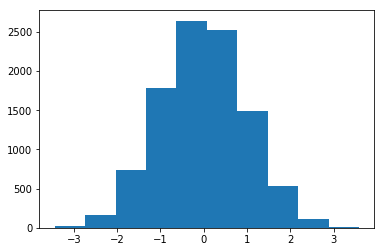

In [11]:
np_normal_data = np.random.randn(10000)
plt.hist(np_normal_data)
plt.show()

### TensorFlow

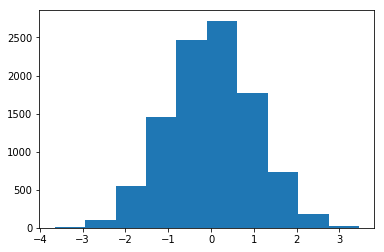

In [12]:
tf_normal = tf.random_normal([10000])
with tf.Session() as session:
    tf_normal_data = tf_normal.eval()
plt.hist(tf_normal_data)
plt.show()